In [13]:
# This program was written in its entirety by Jacob Ivanov, Undergraduate Research Assistant under Dr. Georgios Matheou for the Computational Fluid Dynamics Group at the University of Connecticut.

import ffti_v6 as fi6
import li_v6 as li6
import numpy as np
from time import time
from numba import njit

@njit
def norm(values3D, Ni, Nj, Nk):
   sum = 0
   for i in range(Ni):
      for j in range(Nj):
         for k in range(Nk):
            sum += values3D[i, j, k] ** 2
   return sum ** 0.5 * Ni * Nj * Nk

# D = np.linspace(3, 8, 6) ** 2
D = np.linspace(3, 5, 3) ** 2

li6_time = np.zeros(6), np.zeros(6)
fi6_time = np.zeros(6), np.zeros(6)

li6_error = np.zeros(6), np.zeros(6) 
fi6_error = np.zeros(6), np.zeros(6)

def func(x, y, z):
   rho = np.e ** (np.sin(x) + np.sin(y) + np.sin(z))
   return rho

x_max, y_max, z_max = 2 * np.pi, 2 * np.pi, 2 * np.pi

for d in range(len(D)):
   Ni, Nj, Nk = int(D[d]), int(D[d]), int(D[d])
   
   x, y, z = np.linspace(0, x_max, Ni), np.linspace(0, y_max, Nj), np.linspace(0, z_max, Nk)
   
   t_init = time()
   rho = np.zeros(shape = (Ni, Nj, Nk))
   for i in range(0, Ni): 
      for j in range(0, Nj): 
         for k in range(0, Nk):
            rho[i, j, k] = func(x[i], y[j], z[k])
         print("Building rho Data, D = {0}. \tProgress: {1:07.3f}% Complete".format(int(D[d]), 100 * (i + ((j + 1 ) / Nj) ) / Ni), end = '\r')
   t_build = time()
   print("Building rho Data, D = {0}. \tProgress: 100.000% Complete\t Process Time: {1:10.5f} s".format(int(D[d]), t_build - t_init))

   Ni_inter, Nj_inter, Nk_inter = 4 * Ni, 4 * Nj, 4 * Nk
   x_inter, y_inter, z_inter = np.linspace(0, x_max, Ni_inter), np.linspace(0, y_max, Nj_inter), np.linspace(0, z_max, Nk_inter)

   rho_li6 = np.zeros(shape = (Ni_inter, Nj_inter, Nk_inter))
   rho_li6_error = np.zeros(shape = (Ni_inter, Nj_inter, Nk_inter))
   rho_fi6 = np.zeros(shape = (Ni_inter, Nj_inter, Nk_inter))
   rho_fi6_error = np.zeros(shape = (Ni_inter, Nj_inter, Nk_inter))

   li6_t = []
   li6_e = []
   fi6_t = []
   fi6_e = []
   
   for r in range(0, 1):
      t_s = time()
      for i in range(0, Ni_inter): 
         for j in range(0, Nj_inter): 
            for k in range(0, Nk_inter):
               rho_li6[i, j, k] = li6.inter_3D(x, y, z, rho, pos = [x_inter[i], y_inter[j], z_inter[k]], order = 'zyx')
            print("li6 Interpolation. \t\tProgress: {0:07.3f}% Complete".format(100 * (i + ((j + 1 ) / Nj_inter) ) / Ni_inter), end = '\r')
      t_f = time()
      li6_t.append(t_f - t_s)
      print("li6 Interpolation. \t\tProgress: 100.000% Complete\t Process Time: {0:10.5f} s".format(t_f - t_s))
      print(li6_t)

      t_s = time()
      for i in range(0, Ni_inter): 
         for j in range(0, Nj_inter): 
            for k in range(0, Nk_inter):
               rho_li6_error[i, j, k] = rho_li6[i, j, k] - func(x_inter[i], y_inter[j], z_inter[k])
            print("li6 Error Quantification. \tProgress: {0:07.3f}% Complete".format(100 * (i + ((j + 1 ) / Nj_inter) ) / Ni_inter), end = '\r')
      t_f = time()
      li6_e.append(norm(rho_li6_error, Ni_inter, Nj_inter, Nk_inter))
      print("li6 Error Quantification. \tProgress: 100.000% Complete\t Process Time: {0:10.5f} s".format(t_f - t_s))
      print(li6_e)

      '''
      t_s = time()
      for i in range(0, Ni_inter): 
         for j in range(0, Nj_inter): 
            for k in range(0, Nk_inter):
               rho_li6[i, j, k] = fi6.inter_3D(x, y, z, rho, pos = [x_inter[i], y_inter[j], z_inter[k]], order = 'zyx')
            print("fi6 Interpolation. \t\tProgress: {0:07.3f}% Complete".format(100 * (i + ((j + 1 ) / Nj_inter) ) / Ni_inter), end = '\r')
      t_f = time()
      fi6_t.append(t_f - t_s)
      print(fi6_t)
      print("fi6 Interpolation. \t\tProgress: 100.000% Complete\t Process Time: {0:10.5f} s".format(t_f - t_s))

      t_s = time()
      for i in range(0, Ni_inter): 
         for j in range(0, Nj_inter): 
            for k in range(0, Nk_inter):
               rho_fi6_error[i, j, k] = rho_fi6[i, j, k] - func(x_inter[i], y_inter[j], z_inter[k])
            print("fi6 Error Quantification. \tProgress: {0:07.3f}% Complete".format(100 * (i + ((j + 1 ) / Nj_inter) ) / Ni_inter), end = '\r')
      t_f = time()
      fi6_e.append(l2norm_3D(rho_li6_error, Ni_inter, Nj_inter, Nk_inter))
      print(fi6_e)
      print("fi6 Error Quantification. \tProgress: 100.000% Complete\t Process Time: {0:10.5f} s".format(t_f - t_s))
   '''

   li6_time[0][d], li6_time[1][d] = np.mean(li6_t), np.std(li6_t)
   # fi6_time[0][d], fi6_time[1][d] = np.mean(fi6_t), np.std(fi6_t)

   li6_error[0][d], li6_error[1][d] = np.mean(li6_e), np.std(li6_e)
   # fi6_error[0][d], fi6_error[1][d] = np.mean(fi6_e), np.std(fi6_e)

Building rho Data, D = 9. 	Progress: 100.000% Complete	 Process Time:    0.00233 s
li6 Interpolation. 		Progress: 100.000% Complete	 Process Time:   13.08530 s
[13.085301876068115]
li6 Error Quantification. 	Progress: 100.000% Complete	 Process Time:    0.11786 s
[2713718.322615603]
Building rho Data, D = 16. 	Progress: 100.000% Complete	 Process Time:    0.01020 s
li6 Interpolation. 		Progress: 100.000% Complete	 Process Time:  215.86741 s
[215.86741399765015]
li6 Error Quantification. 	Progress: 100.000% Complete	 Process Time:    0.74303 s
[10899232.80043591]
Building rho Data, D = 25. 	Progress: 100.000% Complete	 Process Time:    0.04736 s
li6 Interpolation. 		Progress: 100.000% Complete	 Process Time: 14940.11627 s
[14940.116267204285]
li6 Error Quantification. 	Progress: 100.000% Complete	 Process Time:    2.53192 s
[32297588.73266414]


In [14]:
print(D)
print(li6_time[1])

[ 9. 16. 25.]
[0. 0. 0. 0. 0. 0.]


ValueError: x and y must be the same size

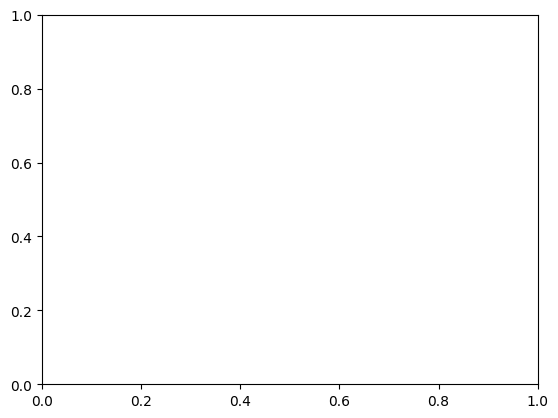

In [2]:
import matplotlib.pyplot as plt
plt.scatter(D, li6_error[0], label = "li6 Error Average")
plt.errorbar(D, li6_error[0], yerr = li6_error[1], label = "li6 Error Standard Deviation")
plt.scatter(D, fi6_error[0], label = "fi6 Error Average")
plt.errorbar(D, fi6_error[0], yerr = fi6_error[1], label = "fi6 Error Standard Deviation")
plt.show()

plt.scatter(D, li6_time[0], label = "li6 Error Average")
plt.errorbar(D, li6_time[0], yerr = li6_time[1], label = "li6 Time Standard Deviation")
plt.scatter(D, fi6_time[0], label = "fi6 Error Average")
plt.errorbar(D, fi6_time[0], yerr = fi6_time[1], label = "fi6 Time Standard Deviation")
plt.show()